In [ ]:
import networkx as nx
import numpy as np
import random
import pandas as pd
!pip install rdkit
from rdkit import Chem
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense , Dropout, BatchNormalization
from rdkit.Chem import Draw
from rdkit.Chem import rdmolops
import matplotlib.pyplot as plt

In [ ]:
#df=pd.read_csv("/content/HIV.csv")
df=pd.read_csv("/content/SMILES_Big_Data_Set.csv")

In [ ]:
#this function finds the number of atoms in the each molcule
def numofatoms (x):
        return len(Chem.MolFromSmiles(x).GetAtoms())

In [ ]:
df

,SMILES,pIC50,mol,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,<rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>,25,4.15910
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>,36,3.67430
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>,23,1.53610
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>,22,0.95100
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>,21,3.21300
...,...,...,...,...,...
16082,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314ed50>,24,3.21560
16083,S=C=NCCCCCCCCCCc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314edc0>,19,5.45270
16084,S=C=NCCCCCCCCc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314ee30>,17,4.67250
16085,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314eea0>,22,3.93289


In [ ]:
#df['num_atoms']=df['smiles'].apply(numofatoms)
df['num_atoms']=df['SMILES'].apply(numofatoms)

In [ ]:
#df=df[df['HIV_active']==0]

In [ ]:
len(df)

16087

In [ ]:
df['num_atoms'].describe()
#df['num_atoms'].describe()

,num_atoms
count,16087.000000
mean,18.749984
std,8.428888
min,3.000000
25%,13.000000
50%,17.000000
75%,23.000000
max,85.000000


In [ ]:
df=df[(df['num_atoms']<21) & (11<df['num_atoms'])]

In [ ]:
def max_degree(m):
    molecule=Chem.MolFromSmiles(m)
    G=nx.Graph(rdmolops.GetAdjacencyMatrix(molecule))
    m_degree=max( list(dict(G.degree()).values()))
    return m_degree

In [ ]:
df['max_degree']=df['SMILES'].apply(max_degree)

<ipython-input-12-f64f46b03843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_degree']=df['SMILES'].apply(max_degree)


In [ ]:
df['max_degree'].describe()

,max_degree
count,7734.000000
mean,3.203776
std,0.411092
min,2.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,6.000000


<Axes: ylabel='Frequency'>

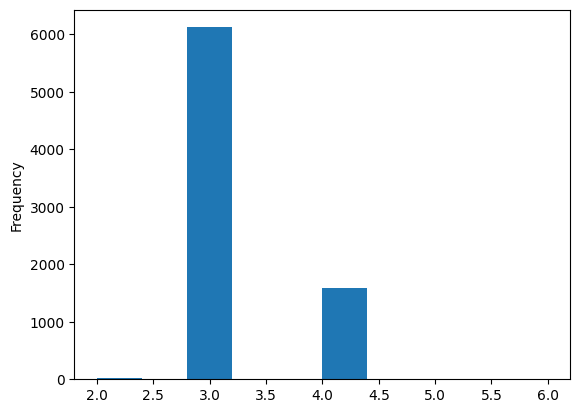

In [ ]:
df['max_degree'].plot(kind='hist')

<Axes: ylabel='Frequency'>

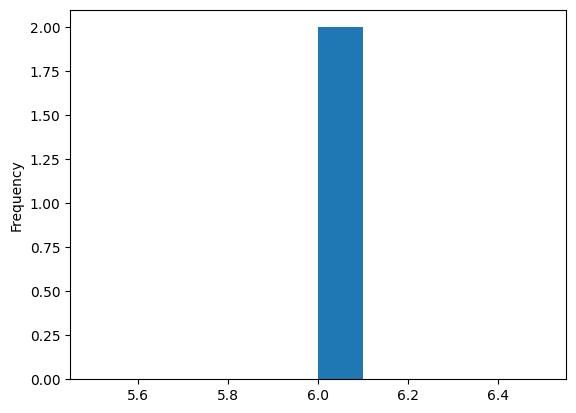

In [ ]:
df[df['max_degree']>4]['max_degree'].plot(kind='hist')

In [ ]:
df =df[df['max_degree']<5]

<Axes: ylabel='Frequency'>

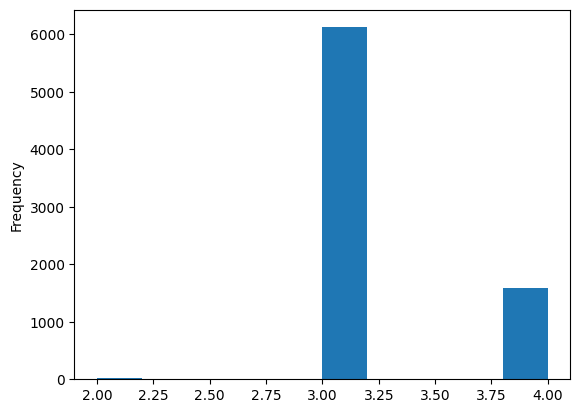

In [ ]:
df['max_degree'].plot(kind='hist')

In [ ]:
#M=[]
#for i in range(len(df)):
#   M.append(Graph_gen(df["smiles"].iloc[i])[5])

In [ ]:
df['SMILES'].iloc[2078]

'CN(C)C(=O)CC1CCCCC1'

In [ ]:
#def atom_types(x):
#  mole=Chem.MolFromSmiles(x)
#  atoms_typs=[atom.GetSymbol() for atom in mole.GetAtoms()]
#  return list(set(atoms_typs))


In [ ]:
#v=[]
#for i in range(len(df)):
#         for atom  in Chem.MolFromSmiles(df.iloc[i,0]).GetAtoms():
 #         v.append(atom.GetSymbol())


In [ ]:
df

,SMILES,pIC50,mol,num_atoms,logP,max_degree
78,Cc1nc2cnc3[nH]ccc3c2n1C1CCCCC1,5.22,<rdkit.Chem.rdchem.Mol object at 0x7f59a320eb20>,19,3.72622,3
80,c1cc2c(ncc3ncn(C4CCCCC4)c32)[nH]1,5.24,<rdkit.Chem.rdchem.Mol object at 0x7f59a320ec00>,18,3.41780,3
123,NCCc1nc2cc(C(N)=O)ccc2n1CCN,5.54,<rdkit.Chem.rdchem.Mol object at 0x7f59a320fed0>,18,-0.40490,3
126,COc1ccc(-c2cccn3nc(N)nc23)cn1,5.54,<rdkit.Chem.rdchem.Mol object at 0x7f59a31deab0>,18,1.38210,3
142,c1nc(-c2cn(CC3CO3)nn2)c2cc[nH]c2n1,5.61,<rdkit.Chem.rdchem.Mol object at 0x7f59a31df1b0>,18,0.61520,3
...,...,...,...,...,...,...
16077,O=c1cc(CSc2nc3ccccc3[nH]2)occ1O,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314eb20>,19,2.51400,3
16078,O=c1cc(CSc2nc3ccccc3s2)occ1O,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314eb90>,19,3.24740,3
16083,S=C=NCCCCCCCCCCc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314edc0>,19,5.45270,3
16084,S=C=NCCCCCCCCc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314ee30>,17,4.67250,3


In [ ]:
df['logP'].describe()

,logP
count,7732.000000
mean,2.125830
std,1.576481
min,-3.585400
25%,1.182150
50%,2.034490
75%,2.926150
max,9.453600


<Axes: ylabel='Frequency'>

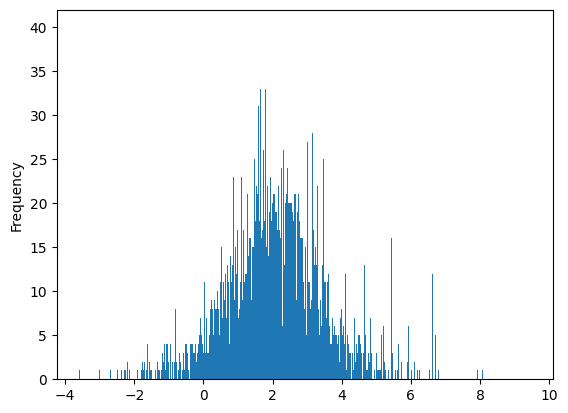

In [ ]:
df['logP'].plot(kind='hist', bins=1500)

In [ ]:
df_N=df[df['logP']>2.1]

In [ ]:
df_N

,SMILES,pIC50,mol,num_atoms,logP,max_degree
78,Cc1nc2cnc3[nH]ccc3c2n1C1CCCCC1,5.22,<rdkit.Chem.rdchem.Mol object at 0x7f59a320eb20>,19,3.72622,3
80,c1cc2c(ncc3ncn(C4CCCCC4)c32)[nH]1,5.24,<rdkit.Chem.rdchem.Mol object at 0x7f59a320ec00>,18,3.41780,3
158,CN(c1ccnc2[nH]ccc12)C1CCCCC1,5.75,<rdkit.Chem.rdchem.Mol object at 0x7f59a31df8b0>,17,3.33180,3
213,c1ccc(Nc2nc3ccccn3n2)cc1,5.96,<rdkit.Chem.rdchem.Mol object at 0x7f59a2939150>,16,2.47290,3
218,Cc1ccc(Cl)cc1-c1nc(-c2ccnc(N)n2)c[nH]1,5.97,<rdkit.Chem.rdchem.Mol object at 0x7f59a2939380>,20,3.07772,3
...,...,...,...,...,...,...
16065,O=c1cc(CSC2CCCCC2)occ1O,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314e5e0>,16,2.91130,3
16077,O=c1cc(CSc2nc3ccccc3[nH]2)occ1O,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314eb20>,19,2.51400,3
16078,O=c1cc(CSc2nc3ccccc3s2)occ1O,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314eb90>,19,3.24740,3
16083,S=C=NCCCCCCCCCCc1ccccc1,0.00,<rdkit.Chem.rdchem.Mol object at 0x7f59a314edc0>,19,5.45270,3


In [ ]:
train_df,test_df=train_test_split(df['SMILES'],test_size=0.1,shuffle=True , random_state=42)
#train_df,test_df=train_test_split(df_N['SMILES'],test_size=0.1,shuffle=True , random_state=42)

In [ ]:
train_df

,SMILES
13156,c1ccc(Sc2nnc[nH]2)cc1
12305,CCOc1ccc(S(I)=C(N(C)C)N(C)C)cc1
3248,O=C(O)c1cccc([N+](=O)[O-])c1
10233,COc1cc(Cc2cnc(N)nc2N)ccc1C
13573,COc1ccc(C(=O)OCCN(C)C)cc1
...,...
11420,O=C(O)CCCC1=NS(=O)(=O)c2cc(Br)ccc2N1
11669,COc1cccc(Cl)c1C(N)=O
4135,Oc1cccc(-c2ccccc2)c1
15809,O=C1N=C(N2CCOCC2)CN1Cc1ccc(I)cc1


In [ ]:
def Graph_gen (m):
  #G=nx.Graph()
  molecule=Chem.MolFromSmiles(m)
#  img=Draw.MolToImage(molecule)

 # for bond in molcule.GetBonds():
 #   G.add_edge(bond.GetBeginAtomIdx(),bond.GetEndAtomIdx())
  G=nx.Graph(rdmolops.GetAdjacencyMatrix(molecule))


  max_edges=int(len(G.nodes())*(len(G.nodes())-1)/2)
  mask=np.ones(max_edges)
  mask =np.pad(mask, (0,190-max_edges),mode='constant', constant_values=0)
  adj=nx.adjacency_matrix(G).toarray()

  bfs_nodes=list(nx.bfs_tree(G,source=random.randint(0,len(G.nodes())-1)))
  #bfs_nodes=list(nx.bfs_tree(G,source=max( list(dict(G.degree())))))
#  bfs_nodes=list(nx.bfs_tree(G,source=min( nx.betweenness_centrality(G),key=nx.betweenness_centrality(G).get)))
  #print(bfs_nodes)
  y_EOS=np.zeros(len(G.nodes()))
  y_EOS[len(G.nodes())-1]=1
  EOS_mask=np.ones(len(y_EOS))
  EOS_mask=np.pad(EOS_mask,(0,20-len(EOS_mask)),mode='constant', constant_values=0)
  y_EOS=np.pad(y_EOS, (0,20-len(y_EOS)),mode='constant', constant_values=-1)

  x=[-1]
  for i in range(len(bfs_nodes)-2) :
      x.append(-1)
      for node in bfs_nodes [i::-1]:

            x.append(adj[bfs_nodes[i+2]][node])

  y=[]
  for i in range(len(bfs_nodes)-1) :
    for node in bfs_nodes[:i+1]:
      y.append(adj[bfs_nodes[i+1]][node])
  #nx.draw(G)
  x_padded=np.pad(np.array(x), (0,190-len(x)), mode='constant',constant_values=-1)
  y_padded=np.pad(np.array(y), (0,190-len(y)), mode='constant',constant_values=-1)
  return  x_padded,  mask, y_padded, y_EOS , EOS_mask
  # ,max( list(dict(G.degree()).values())),img




In [ ]:
Graph_gen(df_N['SMILES'].iloc[160])

(array([-1, -1,  1, -1,  1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  0, -1,  0,
         0,  1,  0,  0, -1,  0,  1,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,
         0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,
         0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, -1,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

<Axes: ylabel='Frequency'>

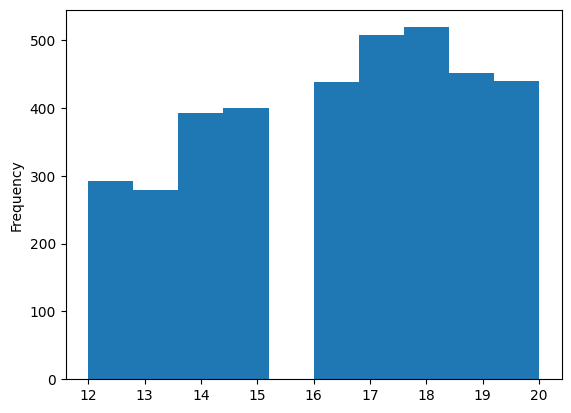

In [ ]:
df_N['num_atoms'].plot(kind='hist')

In [ ]:
#M.index(max(M))

In [ ]:

Graph_gen(df['SMILES'].iloc[718])

(array([-1, -1,  0, -1,  1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  0, -1,  0,
         0,  1,  0,  0, -1,  0,  1,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,
         0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,
         0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [ ]:
class Multiple_GRU_layer2 (tf.keras.layers.Layer):
  def __init__(self,units_list, num_cells):
    super(Multiple_GRU_layer2,self).__init__()
    self.units_list=units_list
    self.num_cells=num_cells
    self.gru_cells=[tf.keras.layers.GRUCell(self.units_list[i]) for i in range(self.num_cells)]

  def  build (self, input_shapes):

       self.L01T=self.add_weight (name='01T',
                                      shape=(self.units_list[1],self.units_list[0]),
                                      initializer='glorot_uniform',
                                      trainable=True)
       self.L10T=self.add_weight(name='10T',
                                      shape=(self.units_list[0],self.units_list[1]),
                                      initializer='glorot_uniform',
                                      trainable=True)
      # self.L23T=self.add_weight(name='20T',
                   #                   shape=(self.units_list[3],self.units_list[2]),
                   #                   initializer='glorot_uniform',
                   #                   trainable=True)
      # self.L30T=self.add_weight(name='20T',
                   #                   shape=(self.units_list[0],self.units_list[3]),
                   #                   initializer='glorot_uniform',
                   #                   trainable=True)
     #  self.LT=[self.L01T,self.L12T, self.L23T, self.L30T]

       self.LT=[self.L01T,self.L10T]
  def call (self, inputs ):
    input, state=inputs
    output=input

    for i in range(self.num_cells):
         output,state=self.gru_cells[i](output, state)
         state=tf.transpose(tf.matmul(self.LT[i],tf.transpose(state)))
    return output,state






In [ ]:
class Multiple_GRU_layer (tf.keras.layers.Layer):
  def __init__(self,units_list, num_cells):
    super(Multiple_GRU_layer,self).__init__()
    self.units_list=units_list
    self.num_cells=num_cells
    self.gru_cells=[tf.keras.layers.GRUCell(self.units_list[i]) for i in range(self.num_cells)]



  def call (self, inputs ):
    input, state=inputs
    output=input

    for i in range(self.num_cells):
         output,state=self.gru_cells[i](output, state)
    return output,state



In [456]:
class GRNN_layer(tf.keras.Model):
  def __init__(self, max_nodes, node_units_list, edge_units_list,num_cells_nodes, num_cells_edges):
    super(GRNN_layer,self).__init__()
    #self.units=units
    self.max_nodes=max_nodes
    self.max_edges=tf.cast(max_nodes*(max_nodes-1)/2, tf.int32)
    self.node_units_list=node_units_list
    self.edge_units_list=edge_units_list
    self.num_cells_nodes=num_cells_nodes
    self.num_cells_edges=num_cells_edges
    #self.GRU_nodes=tf.keras.layers.GRUCell(units)
    self.GRU_nodes=Multiple_GRU_layer(self.node_units_list, self.num_cells_nodes)
    #self.GRU_edges=tf.keras.layers.GRUCell(units)
    self.GRU_edges=Multiple_GRU_layer(self.edge_units_list, self.num_cells_edges)

    self.dense_edges_1=tf.keras.layers.Dense(8,activation='relu')
   # self.dense_edges_12=tf.keras.layers.Dense(8,activation='relu')

    self.dense_edges_2=tf.keras.layers.Dense(1,activation='sigmoid')

    #self.dense_EOS_1=tf.keras.layers.Dense(8,activation='relu')
    self.dense_EOS_2=tf.keras.layers.Dense(1,activation='sigmoid')

  def build(self, input_shapes):
        self.LT1= self.add_weight(name='node2edgeT',
                                      shape=(self.edge_units_list[0],self.node_units_list[self.num_cells_nodes-1]),
                                      initializer='glorot_uniform',
                                      trainable=True)
        self.LT2= self.add_weight(name='edge2nodeT',
                                      shape=(self.node_units_list[self.num_cells_nodes-1],self.edge_units_list[0]),
                                      initializer='glorot_uniform',
                                      trainable=True)


  def call (self, inputs ,training ):

    if training ==True:


      batch_size=tf.shape(inputs)[0]

      SOS_node=tf.zeros((batch_size,self.node_units_list[0]))
      node_level_input=SOS_node
      node_level_H=tf.zeros((batch_size,self.node_units_list[0]))
      model_output=tf.TensorArray(size=tf.shape(inputs)[1],element_shape=(tf.shape(inputs)[0],), dtype=tf.float32)
      EOS_matrix=tf.TensorArray(size=20,element_shape=(tf.shape(inputs)[0],),dtype=tf.float32)

      iteration_output_degrees=tf.TensorArray(size=20,element_shape=(batch_size,1), dtype=tf.float32)


      for i in  range(self.max_nodes) :

          node_level_output,node_level_H=self.GRU_nodes([node_level_input, node_level_H])
          edge_level_H=tf.transpose(tf.matmul(self.LT1,tf.transpose(node_level_output)))
          #EOS_values_1=self.dense_EOS_1(node_level_output)
          EOS_values_2=self.dense_EOS_2(node_level_output)

          EOS_values=tf.reshape(EOS_values_2,[batch_size])
          EOS_matrix=EOS_matrix.write(i,EOS_values)

          iteration_output_edge_exist=tf.zeros([batch_size,1],tf.float32)
          for j in range(i+1):

                edge_level_input=inputs[:,i+j]
                edge_level_input=tf.cast(edge_level_input,tf.float32)
                edge_level_input=tf.reshape(edge_level_input, [batch_size,1])


                edge_level_output,edge_level_H=self.GRU_edges([edge_level_input,edge_level_H])
                edge_level_output_f1=self.dense_edges_1(edge_level_output)
            #edge_level_output_f12=self.dense_edges_12(edge_level_output_f1)

                edge_level_output_f2=self.dense_edges_2(edge_level_output_f1)
                edge_level_output_f=tf.reshape(edge_level_output_f2, [batch_size])
                model_output=model_output.write(i+j,edge_level_output_f)

                edge_level_output_P=np.random.binomial(1,p=edge_level_output_f)
            #prin,t(edge_level_output_P)
                edge_level_output_P=tf.reshape(edge_level_output_P, [batch_size,1])

          #  print(edge_level_output_P)
            #edge_level_output_P=tf.reduce_sum(edge_level_output_P,0)
            #print(edge_level_output_P)
            #print(tf.cast(tf.equal(edge_level_output_P,0), tf.float32))


                iteration_output_edge_exist=iteration_output_edge_exist+tf.cast(edge_level_output_P,tf.float32)
            #iteration_output_degrees.append(tf.cast(tf.nn.relu(edge_level_output_P-4), tf.float32)+tf.cast(tf.equal(edge_level_output_P,0), tf.float32))

           # print(tf.cast(tf.nn.relu(edge_level_output_P-4), tf.float32)+tf.cast(tf.equal(edge_level_output_P,0), tf.float32))

          node_level_input=tf.transpose(tf.matmul(self.LT2,tf.transpose(edge_level_H)))
        #  print(tf.constant(iteration_output_edge_exist),shape=())
         # output_edges=tf.reduce_sum(iteration_output_edge_exist,0)
         # print(output_edges)
          iteration_output_degrees=iteration_output_degrees.write(i,iteration_output_edge_exist)

           #(tf.cast(tf.equal(edge_level_output_P,0), tf.float32)+tf.cast(tf.nn.relu(edge_level_output_P-4), tf.float32))

      model_output=model_output.stack()
      EOS_matrix=EOS_matrix.stack()
      return model_output , EOS_matrix ,tf.reshape(iteration_output_degrees.stack(),[20,batch_size])


    if training !=True :
      i =1
      model_output=[]
      SOS_node=tf.zeros((1,self.node_units_list[0]))
      node_level_input=SOS_node
      node_level_H=tf.zeros((1,self.node_units_list[0]))

      while True :
        node_level_output,node_level_H=self.GRU_nodes([node_level_input, node_level_H])
        #EOS_1 = self.dense_EOS_1(node_level_output)
        EOS =self.dense_EOS_2(node_level_output)

        if EOS[0,0].numpy() >0.3:

                break
        edge_level_H=tf.transpose(tf.matmul(self.LT1,tf.transpose(node_level_output)))
        edge_level_input=tf.constant(-1, tf.float32)

       #EOS = self.dense_EOS(edge_level_output)
       #if EOS[0,0].numpy() >0.5 :
       #         break
        iteration_output=[]
        for j in range(i):
            edge_level_input=tf.reshape(edge_level_input,[1,1])
            #print(edge_level_input)
            edge_level_output,edge_level_H=self.GRU_edges([edge_level_input,edge_level_H])
            #print(edge_level_output)
            #print(eedge_level_H)
            edge_level_output_f1=self.dense_edges_1(edge_level_output)
            edge_level_output_P=self.dense_edges_2(edge_level_output_f1)
            edge_level_output_f=np.random.binomial(1,p=edge_level_output_P)
            iteration_output.append(edge_level_output_f)
            edge_level_input=tf.cast(edge_level_output_f, tf.float32)
        model_output.append(iteration_output)
        node_level_input=tf.transpose(tf.matmul(self.LT2,tf.transpose(edge_level_H)))
        i=i+1

      return model_output

In [505]:
#model=GRNN_layer( max_nodes=20, node_units_list=[64,64,64],edge_units_list=[7,7,7],num_cells_nodes=3,num_cells_edges=3)
#model=GRNN_layer( max_nodes=15, node_units_list=[32,32,32],edge_units_list=[7,7,7],num_cells_nodes=3,num_cells_edges=3)
#model=GRNN_layer( max_nodes=20, node_units_list=[80,80,80,80],edge_units_list=[40,40,40,40],num_cells_nodes=4,num_cells_edges=4)
model=GRNN_layer( max_nodes=20, node_units_list=[80,80,80,80],edge_units_list=[20,20,20,20],num_cells_nodes=4,num_cells_edges=4) #intersting results


#loss_f=tf.keras.losses.BinaryCrossentropy(from_logits=False,reduction=tf.keras.losses.Reduction.NONE)


In [506]:
def loss_f (y_true , y_preds):
   bce= -y_true*tf.math.log(y_preds+1e-7)-(1-y_true)*tf.math.log(1-y_preds+1e-7)
   return bce

In [507]:
#def loss_f2 (y_true , y_preds):
  # weights=y_true *1.7+(1-y_true)*1
  # bce=-y_true*tf.math.log(y_preds+1e-7)-(1-y_true)*tf.math.log(1-y_preds+1e-7)
  # return bce *weights

In [508]:
rates=[0.0007]
#1 0.0007 #0.0002  good results till here,0.00008 not better ,0.00002

In [509]:
optimizer_list=[ tf.keras.optimizers.Adam(learning_rate=rate) for rate in rates]

In [510]:
def degree_loss_1(output_degrees):

    return tf.square(tf.nn.relu(output_degrees-4))

In [511]:

def degree_loss_2(output_degrees):
   return tf.cast(tf.equal(output_degrees,0), tf.float32)

In [512]:
num_epochs=len(rates)#3,2
batch_size=10
#batch_size=500
loss_list=[]
edge_loss_list=[]
train_datax=train_df[:2000]
for epoch in range(num_epochs):
    optimizer=optimizer_list[epoch]
    perm = np.random.permutation(len(train_datax))
    train_data=train_datax.iloc[perm]
    num_batches = len(train_data) // batch_size
    for i in range(num_batches):
        start_index = int(i * batch_size)
        end_index = int(start_index + batch_size)
        x=train_data.iloc[start_index: end_index].apply(Graph_gen)
     #  x=train_data.sample(batch_size).apply(Graph_gen)
        graph_seq=np.array([x.iloc[j][0] for j in range(batch_size)])
        mask=np.array([x.iloc[j][1] for j in range(batch_size)])
        y=np.array([x.iloc[j][2] for j in range(batch_size)])
        y_EOS=np.array([x.iloc[j][3] for j in range(batch_size)])
        EOS_mask=np.array([x.iloc[j][4] for j in range(batch_size)])

        #f_mask=mask
        #f_EOS_mask=EOS_mask
        f_mask=tf.cast(tf.divide(mask, tf.tile(tf.reduce_sum(mask, axis=1, keepdims=True),[1,190])), tf.float32)
        f_EOS_mask=tf.cast(tf.divide(EOS_mask, tf.tile(tf.reduce_sum(EOS_mask, axis=1, keepdims=True),[1,20])), tf.float32)
        with tf.GradientTape() as tape:
            logits, EOS_preds , degree_seq = model(graph_seq, training=True)
            edge_loss=tf.reduce_sum(tf.multiply(loss_f(y,tf.transpose(logits)),f_mask))
#            loss = edge_loss+tf.reduce_sum(tf.multiply(loss_f(y_EOS,tf.transpose(EOS_preds)),f_EOS_mask))+tf.reduce_sum(tf.transpose(degree_loss_1(degree_seq)))/10+tf.reduce_sum(degree_loss_2(degree_seq))/20
            loss = edge_loss+tf.reduce_sum(tf.multiply(loss_f(y_EOS,tf.transpose(EOS_preds)),f_EOS_mask))+10*tf.reduce_sum(tf.multiply(f_EOS_mask,tf.transpose(degree_loss_1(degree_seq))))+2*tf.reduce_sum(tf.multiply(f_EOS_mask,tf.transpose(degree_loss_2(degree_seq))))

            edge_loss_list.append(edge_loss)

            loss_list.append(loss/batch_size)
        gradients = tape.gradient(loss, model.trainable_variables)
       # clipped_gradients=[tf.clip_by_value(grad, clip_value_max=1, clip_value_min=-1) for grad in gradients]

        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [514]:
def mole_gen(x_seq):
   num_nodes=len(x_seq)+1
   x=np.zeros((num_nodes, num_nodes))
   for i in range(num_nodes-1):
      t=0
      for j in range(i,-1, -1):
        x[j,i+1]=x_seq[i][t]
        x[i+1,j]=x_seq[i][t]
        t=t+1
   return x

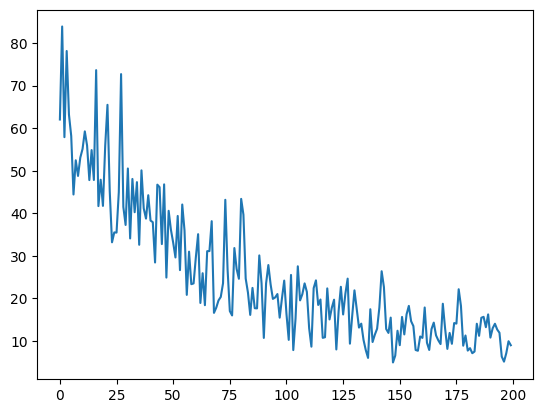

In [515]:
plt.plot(loss_list)

18


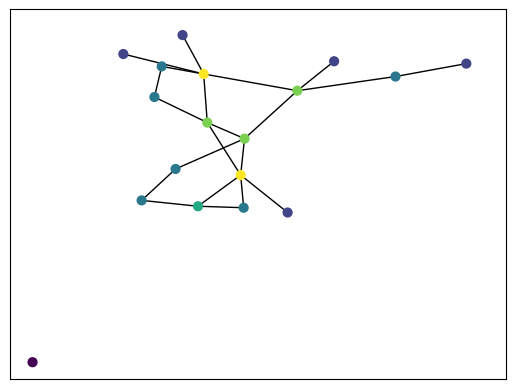

In [494]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

17


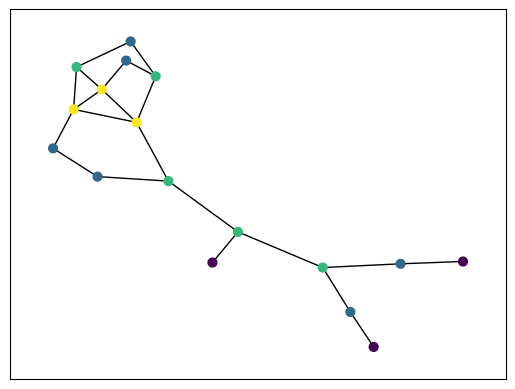

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

16


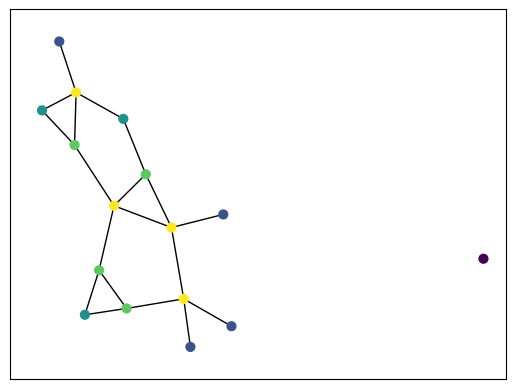

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

17


<ipython-input-320-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-320-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


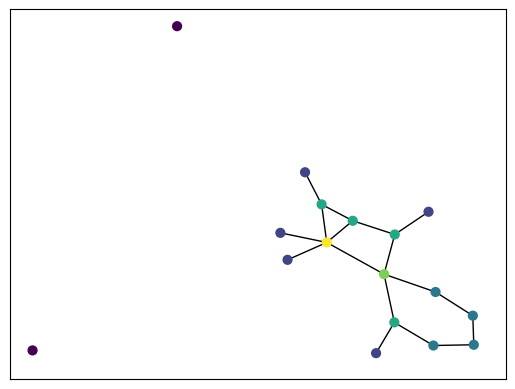

In [ ]:
mol=model([],training=False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

17


<ipython-input-320-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-320-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


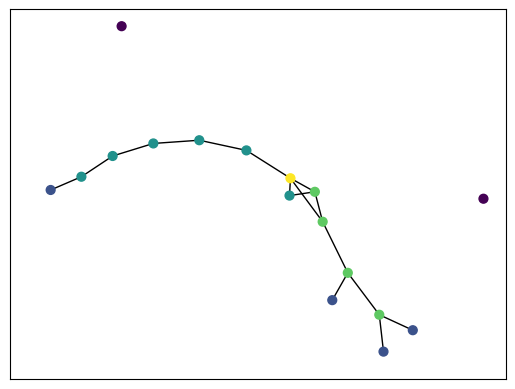

In [ ]:
mol=model([],training=False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

17


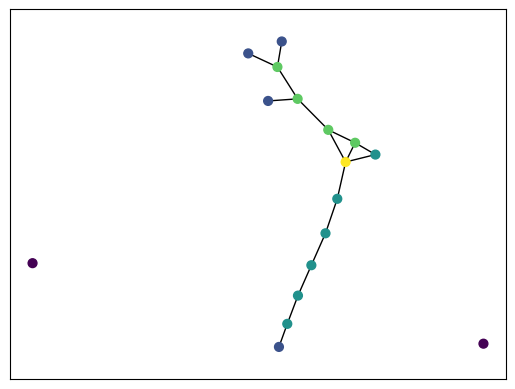

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

17


<ipython-input-320-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-320-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


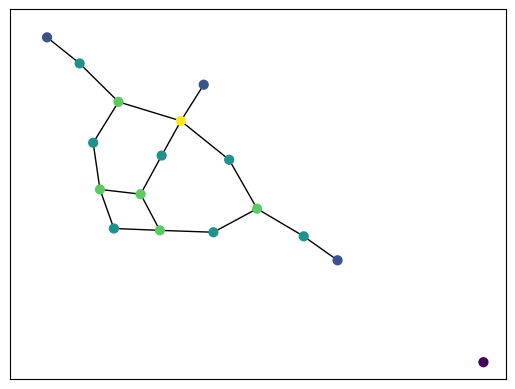

In [ ]:
mol=model([],training=False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

18


<ipython-input-320-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-320-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


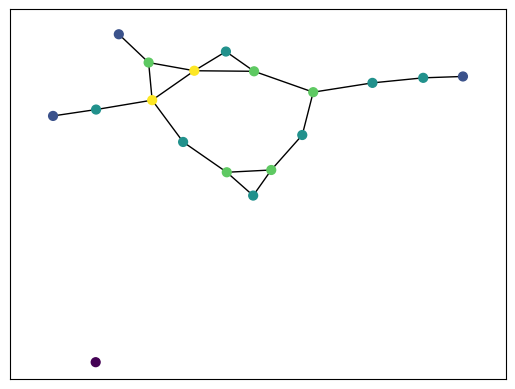

In [ ]:
mol=model([],training=False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

17


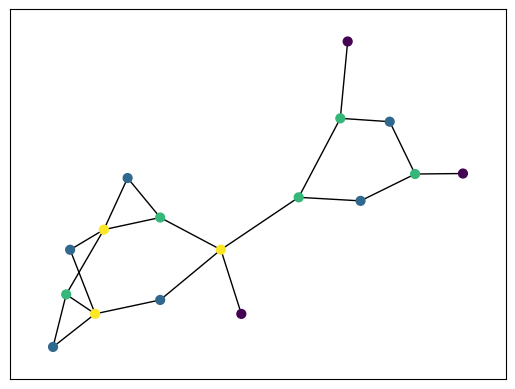

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


<ipython-input-203-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-203-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


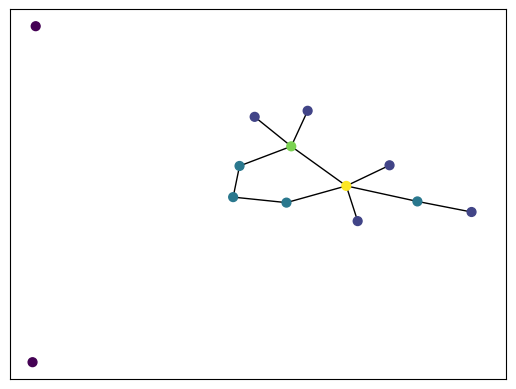

In [ ]:
mol=model([],training=False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


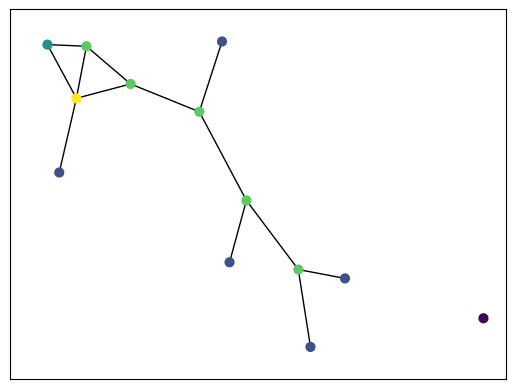

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


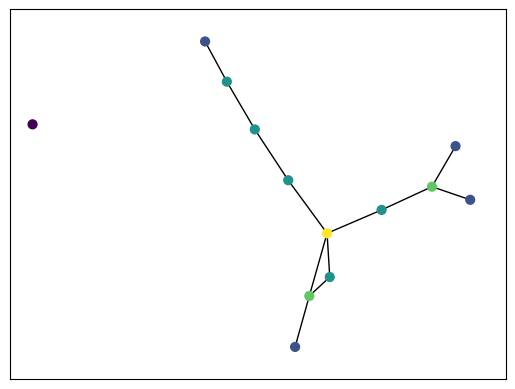

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

14


<ipython-input-203-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-203-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


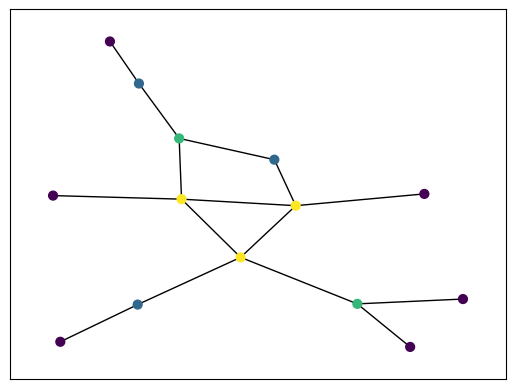

In [ ]:

mol=model([],training=False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


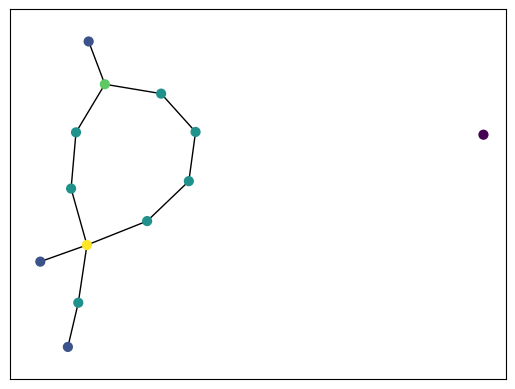

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


<ipython-input-203-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-203-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


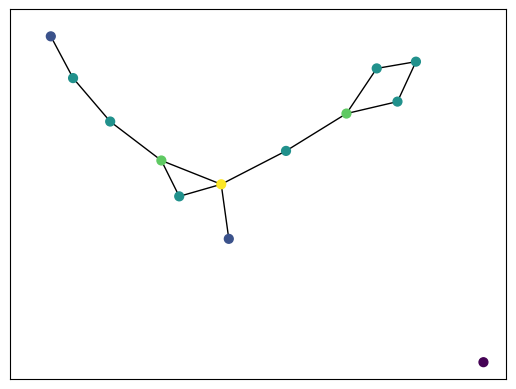

In [ ]:
mol=model([],False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


<ipython-input-203-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-203-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


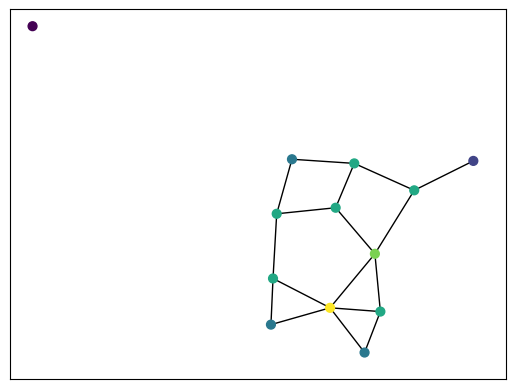

In [ ]:
mol=model([],False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


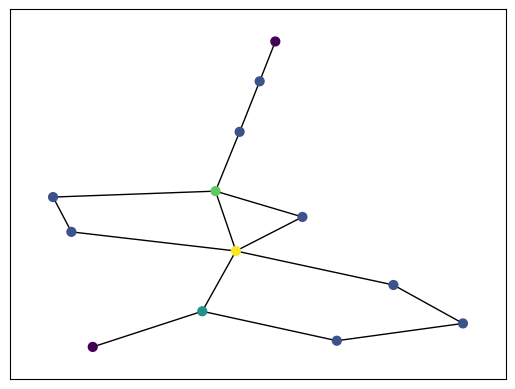

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


<ipython-input-203-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-203-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


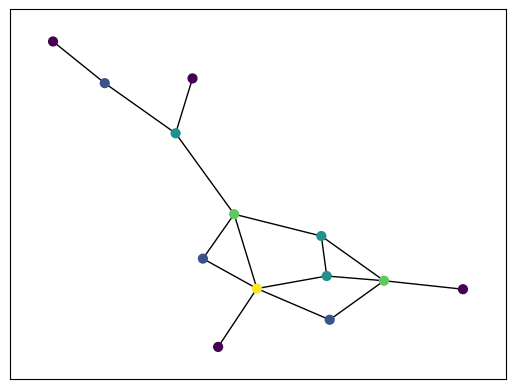

In [ ]:
mol=model([],False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


<ipython-input-203-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-203-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


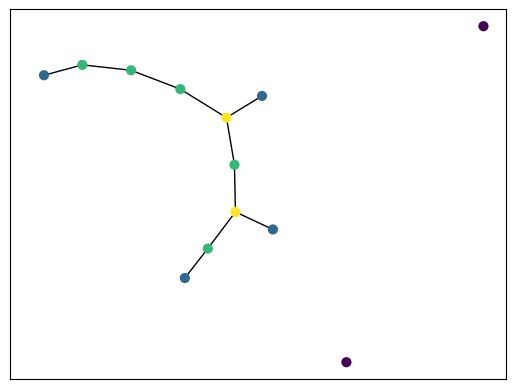

In [ ]:
mol=model([],False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


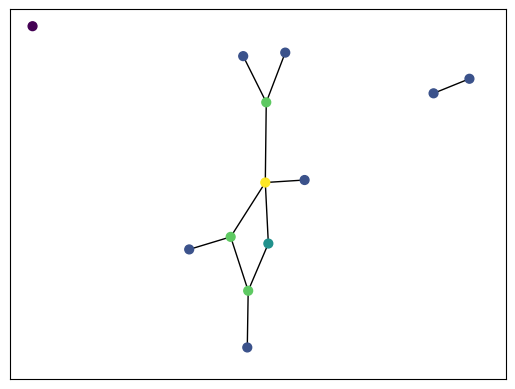

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

14


<ipython-input-203-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-203-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


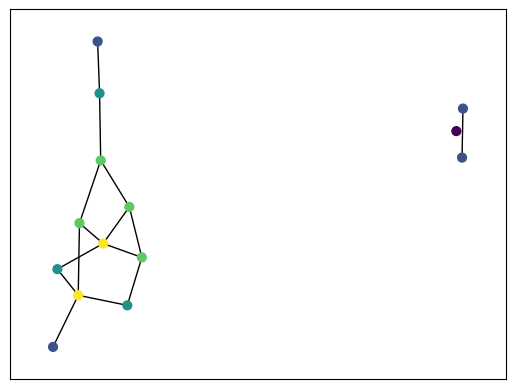

In [ ]:
mol=model([],False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

14


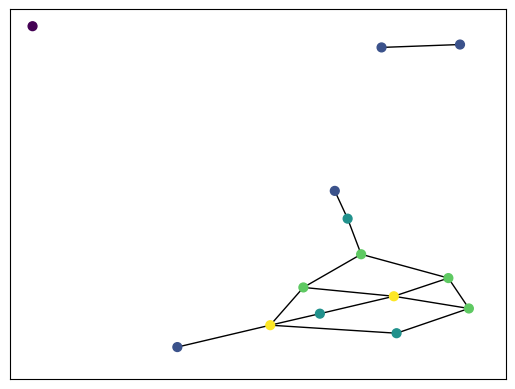

In [ ]:
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


<ipython-input-203-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-203-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


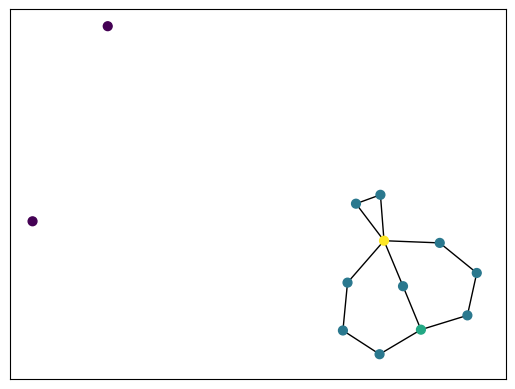

In [ ]:
mol=model([],False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)

13


<ipython-input-203-00bf49c8f652>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j,i+1]=x_seq[i][t]
<ipython-input-203-00bf49c8f652>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1,j]=x_seq[i][t]


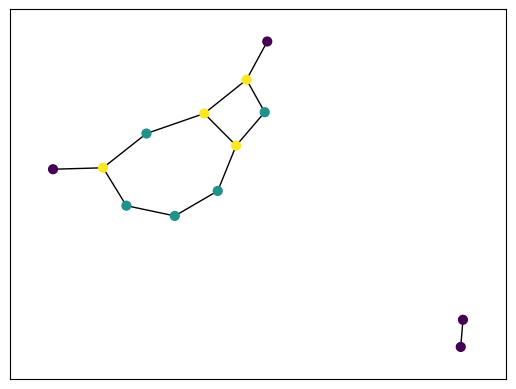

In [ ]:
mol=model([],False)
mol_adj=mole_gen(mol)
G=nx.from_numpy_array(mol_adj)
c=[y for  (x,y) in list(G.degree())]
nx.draw_networkx(G,node_size=40,  node_color=c, with_labels=False)
print(len(mol)+1)